In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\Rahul\Desktop\Tradexa\games\games.csv', header = 0)

In [3]:
df.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [4]:
df.shape

(20058, 16)

In [5]:
df.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483617e+12,1.483618e+12,60.465999,1596.631868,1588.831987,4.816981
std,2.850151e+10,2.850140e+10,33.570585,291.253376,291.036126,2.797152
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000
25%,1.477548e+12,1.477548e+12,37.000000,1398.000000,1391.000000,3.000000
50%,1.496010e+12,1.496010e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.503170e+12,1.503170e+12,79.000000,1793.000000,1784.000000,6.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000


In [6]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64


In [8]:
df['game_duration'] = df.last_move_at - df.created_at

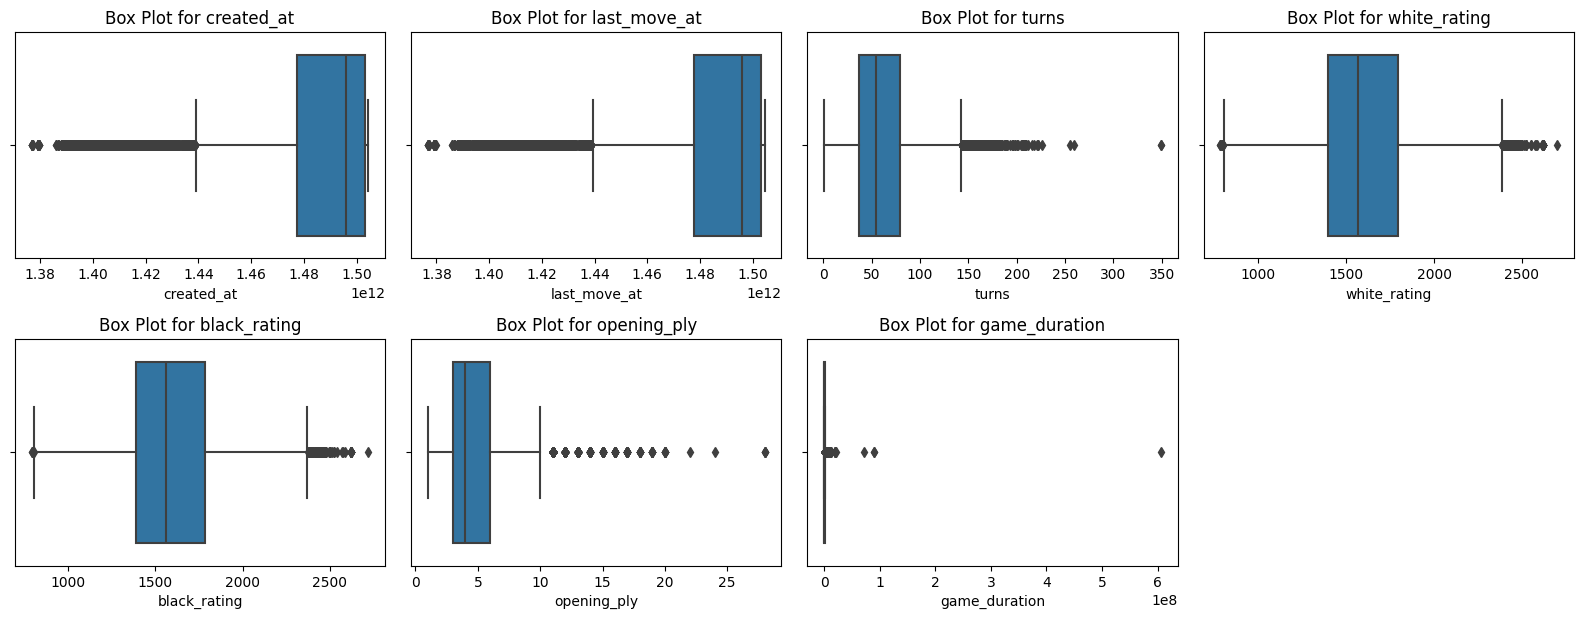

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns for box plots
numeric_cols = df.select_dtypes(include='number').columns

# Create box plots for each numeric column
plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot for {col}')

plt.tight_layout()
plt.show()

### Outlier Treatment
#### Capping and flooring

In [10]:
# Calculating the 99th percentile of the 'turns' column in the DataFrame

np.percentile(df['turns'],[99])

array([157.])

In [11]:
# Obtaining the 99th percentile value of the 'turns' column from the DataFrame and save to variable uv1
uv1 = np.percentile(df['turns'],[99])[0]

In [12]:
# Filtering the DataFrame to retrieve rows where 'turns' is greater than 3 times the 99th percentile value

df[(df['turns']) > 3*uv1]

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,game_duration


No Outlier detected in attribute 'turns' and also no outliers in 1% as shown in Box plot


In [13]:
# Calculating the 99th percentile of the 'white_rating' column in the DataFrame

np.percentile(df['white_rating'],[99])

array([2307.43])

In [15]:
# Obtaining the 99th percentile value of the 'white_rating' column from the DataFrame and save to variable uv1
uv2 = np.percentile(df['white_rating'],[99])[0]

In [16]:
# Filtering the DataFrame to retrieve rows where 'white_rating' is greater than 3 times the 99th percentile value

df[(df['white_rating']) > 3*uv2]

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,game_duration


In [17]:
# Calculating the 1st percentile value of the 'white_rating' column in the DataFrame df

np.percentile(df['white_rating'],[1])

array([983.])

In [18]:
# Calculating the 1st percentile value (lv1) of the 'white_rating' column in the DataFrame df

lv1 = np.percentile(df['white_rating'],[1])[0]

In [19]:
# Filtering the DataFrame df for rows where 'white_rating' values are less than 30% of the 1st percentile value (lv1)
df[(df['white_rating']) < 0.3*lv1]

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,game_duration


No outliers detected for attribute white_rating

In [20]:
# Calculating the 99th percentile of the 'black_rating' column in the DataFrame

np.percentile(df['black_rating'],[99])

array([2294.])

In [21]:
# Obtaining the 99th percentile value of the 'black_rating' column from the DataFrame and save to variable uv3
uv3 = np.percentile(df['black_rating'],[99])[0]

In [22]:
# Filtering the DataFrame to retrieve rows where 'black_rating' is greater than 3 times the 99th percentile value

df[(df['black_rating']) > 3*uv3]

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,game_duration


No outlier for Attribute "black_rating"

In [23]:
# Calculating the 99th percentile of the 'opening_ply' column in the DataFrame

np.percentile(df['opening_ply'],[99])

array([14.])

In [24]:
# Obtaining the 99th percentile value of the 'opening_ply' column from the DataFrame and save to variable uv4
uv4 = np.percentile(df['opening_ply'],[99])[0]

In [25]:
# Filtering the DataFrame to retrieve rows where 'opening_ply' is greater than 3 times the 99th percentile value

df[(df['opening_ply']) > 3*uv4]

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,game_duration


No outlier in "opening_ply" attribute

In [26]:
 # Calculating the 99th percentile of the 'game_duration' column in the DataFrame

np.percentile(df['game_duration'],[99])

array([10000000.])

In [28]:
# Obtaining the 99th percentile value of the 'game_duration' column from the DataFrame and save to variable uv5
uv6 = np.percentile(df['game_duration'],[99])[0]

In [29]:
# Filtering the DataFrame to retrieve rows where 'game_duration' is greater than 3 times the 99th percentile value

df[(df['game_duration']) > 3*uv6]

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,game_duration
5852,3STx4QDX,False,1.459140e+12,1.459230e+12,72,draw,draw,30+0,grundlesniffer,1370,tomo1997,1500,e4 e5 Nf3 Bc5 c3 b5 d4 Bb6 Bxb5 a6 Bc4 Nc6 O-O...,C40,King's Pawn Game: Busch-Gass Gambit,4,90000000.0
7918,TjurH9Gx,False,1.448580e+12,1.448670e+12,2,outoftime,black,15+0,slimes1,1500,baccola89,1382,d4 d5,D00,Queen's Pawn Game,2,90000000.0
10754,eyhzu8aj,False,1.389883e+12,1.390489e+12,35,resign,white,180+180,towhen,1245,miladghasemi,1011,d4 f6 Nf3 e5 e3 Nc6 Nc3 d5 Nb5 Qd7 Bd2 a6 Na3 ...,A40,Queen's Pawn,1,605844701.0
17094,gD7a4WY8,True,1.493130e+12,1.493203e+12,2,outoftime,black,14+2,thegasmask,1383,mertoksuz,1522,c4 e5,A20,English Opening: King's English Variation,2,72349390.0


In [30]:
# Remove value greater than 3 times of 99%ile
df.game_duration[(df.game_duration)>3*uv6] = 3*uv6

C:\Users\Rahul\AppData\Local\Temp\ipykernel_2812\1287195915.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.game_duration[(df.game_duration)>3*uv6] = 3*uv6


All outliers removed

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
 16  game_duration   20058 non-null  float64
dtypes: bool(1), float64(3), int64(4

In [33]:
df.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply,game_duration
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000,2.005800e+04
mean,1.483617e+12,1.483618e+12,60.465999,1596.631868,1588.831987,4.816981,8.329041e+05
std,2.850151e+10,2.850140e+10,33.570585,291.253376,291.036126,2.797152,2.012455e+06
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000,0.000000e+00
25%,1.477548e+12,1.477548e+12,37.000000,1398.000000,1391.000000,3.000000,0.000000e+00
50%,1.496010e+12,1.496010e+12,55.000000,1567.000000,1562.000000,4.000000,2.406120e+05
75%,1.503170e+12,1.503170e+12,79.000000,1793.000000,1784.000000,6.000000,7.931712e+05
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000,3.000000e+07


In [35]:
del df['id']

In [36]:
del df['created_at']


In [37]:
del df['last_move_at']

In [38]:
del df['increment_code']

In [39]:
del df['white_id']

In [40]:
del df['black_id']

In [41]:
del df['moves']

In [42]:
del df['opening_eco']

In [43]:
del df['opening_name']

Dummy variables creation 

In [46]:
print(df)

       rated  turns victory_status winner  white_rating  black_rating  \
0      False     13      outoftime  white          1500          1191   
1       True     16         resign  black          1322          1261   
2       True     61           mate  white          1496          1500   
3       True     61           mate  white          1439          1454   
4       True     95           mate  white          1523          1469   
...      ...    ...            ...    ...           ...           ...   
20053   True     24         resign  white          1691          1220   
20054   True     82           mate  black          1233          1196   
20055   True     35           mate  white          1219          1286   
20056   True    109         resign  white          1360          1227   
20057   True     78           mate  black          1235          1339   

       opening_ply  game_duration  
0                5            0.0  
1                4            0.0  
2              

In [48]:
df = pd.get_dummies(df, columns = ["rated", "victory_status"], drop_first = True)

In [50]:
df.head(10)

,turns,winner,white_rating,black_rating,opening_ply,game_duration,rated_True,victory_status_mate,victory_status_outoftime,victory_status_resign
0,13,white,1500,1191,5,0.0,False,False,True,False
1,16,black,1322,1261,4,0.0,True,False,False,True
2,61,white,1496,1500,3,0.0,True,True,False,False
3,61,white,1439,1454,3,0.0,True,True,False,False
4,95,white,1523,1469,5,0.0,True,True,False,False
5,5,draw,1250,1002,4,0.0,False,False,False,False
6,33,white,1520,1423,10,0.0,True,False,False,True
7,9,black,1413,2108,5,0.0,False,False,False,True
8,66,black,1439,1392,6,0.0,True,False,False,True
9,119,white,1381,1209,4,0.0,True,True,False,False


In [51]:
df = df.replace({True: 1, False: 0})

In [52]:
df.head()

,turns,winner,white_rating,black_rating,opening_ply,game_duration,rated_True,victory_status_mate,victory_status_outoftime,victory_status_resign
0,13,white,1500,1191,5,0.0,0,0,1,0
1,16,black,1322,1261,4,0.0,1,0,0,1
2,61,white,1496,1500,3,0.0,1,1,0,0
3,61,white,1439,1454,3,0.0,1,1,0,0
4,95,white,1523,1469,5,0.0,1,1,0,0


In [54]:
df = df.replace({'draw': 0,'white': 1, 'black': 2})

In [56]:
df.head(10)

,turns,winner,white_rating,black_rating,opening_ply,game_duration,rated_True,victory_status_mate,victory_status_outoftime,victory_status_resign
0,13,1,1500,1191,5,0.0,0,0,1,0
1,16,2,1322,1261,4,0.0,1,0,0,1
2,61,1,1496,1500,3,0.0,1,1,0,0
3,61,1,1439,1454,3,0.0,1,1,0,0
4,95,1,1523,1469,5,0.0,1,1,0,0
5,5,0,1250,1002,4,0.0,0,0,0,0
6,33,1,1520,1423,10,0.0,1,0,0,1
7,9,2,1413,2108,5,0.0,0,0,0,1
8,66,2,1439,1392,6,0.0,1,0,0,1
9,119,1,1381,1209,4,0.0,1,1,0,0


In [57]:
df.corr()

,turns,winner,white_rating,black_rating,opening_ply,game_duration,rated_True,victory_status_mate,victory_status_outoftime,victory_status_resign
turns,1.000000,-0.056503,0.129753,0.160467,0.055999,0.159519,0.090698,0.100050,0.110572,-0.218343
winner,-0.056503,1.000000,-0.143968,0.118235,-0.027893,-0.024060,0.020690,0.075671,0.029741,0.133254
white_rating,0.129753,-0.143968,1.000000,0.634171,0.277379,0.045730,0.003284,-0.156770,0.016607,0.118138
black_rating,0.160467,0.118235,0.634171,1.000000,0.255396,0.051550,0.032655,-0.152489,0.021727,0.114113
opening_ply,0.055999,-0.027893,0.277379,0.255396,1.000000,0.043366,-0.001906,-0.077465,-0.015669,0.073398
game_duration,0.159519,-0.024060,0.045730,0.051550,0.043366,1.000000,-0.032310,-0.011159,0.064172,-0.048395
rated_True,0.090698,0.020690,0.003284,0.032655,-0.001906,-0.032310,1.000000,0.014027,0.002684,-0.002269
victory_status_mate,0.100050,0.075671,-0.156770,-0.152489,-0.077465,-0.011159,0.014027,1.000000,-0.205189,-0.759038
victory_status_outoftime,0.110572,0.029741,0.016607,0.021727,-0.015669,0.064172,0.002684,-0.205189,1.000000,-0.338159
victory_status_resign,-0.218343,0.133254,0.118138,0.114113,0.073398,-0.048395,-0.002269,-0.759038,-0.338159,1.000000


In [58]:
X = df.drop("winner", axis = 1)

In [59]:
y = df['winner']

In [60]:
X.shape

(20058, 9)

In [61]:
y.shape

(20058,)

### Train Test split technique
#### Validation set Approach

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)

In [66]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(16046, 9) (4012, 9) (16046,) (4012,)


In [68]:
import warnings
warnings.filterwarnings("ignore")

### Decision Tree Classification

In [67]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score
import numpy as np


X = df.drop(['winner'], axis=1)  # Assuming 'winner' is the target variable
y = df['winner']

# Method 1: Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clftree_tt = DecisionTreeClassifier(max_depth=3)
clftree_tt.fit(x_train, y_train)
y_train_pred_tt = clftree_tt.predict(x_train)
y_test_pred_tt = clftree_tt.predict(x_test)

# Train-Test Split Performance
cfm_train_tt = confusion_matrix(y_train, y_train_pred_tt)
cfm_test_tt = confusion_matrix(y_test, y_test_pred_tt)
acs_train_tt = accuracy_score(y_train, y_train_pred_tt)
acs_test_tt = accuracy_score(y_test, y_test_pred_tt)
pcs_train_tt = precision_score(y_train, y_train_pred_tt, average='weighted')
pcs_test_tt = precision_score(y_test, y_test_pred_tt, average='weighted')
rcs_train_tt = recall_score(y_train, y_train_pred_tt, average='weighted')
rcs_test_tt = recall_score(y_test, y_test_pred_tt, average='weighted')

# Print results for Train-Test Split
print("\nMethod 1: Train-Test Split Results")
print("Confusion Matrix (Training Data):")
print(cfm_train_tt)
print("\nAccuracy (Training Data):", acs_train_tt)
print("Precision (Training Data):", pcs_train_tt)
print("Recall (Training Data):", rcs_train_tt)
print("\nConfusion Matrix (Testing Data):")
print(cfm_test_tt)
print("\nAccuracy (Testing Data):", acs_test_tt)
print("Precision (Test Data):", pcs_test_tt)
print("Recall (Test Data):", rcs_test_tt)
print("\n" + "-"*50)

# Method 2: Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
clftree_cv = DecisionTreeClassifier(max_depth=3)
cv_scores = cross_val_score(clftree_cv, X, y, cv=kf, scoring='accuracy')
cv_precision = cross_val_score(clftree_cv, X, y, cv=kf, scoring='precision_weighted')
cv_recall = cross_val_score(clftree_cv, X, y, cv=kf, scoring='recall_weighted')

# Print results for Cross-Validation
print("\nMethod 2: Cross-Validation Results")
print("Confusion Matrix (Average):")
print(np.mean([confusion_matrix(y, clftree_cv.fit(X, y).predict(X)) for _ in range(5)], axis=0))
print("Accuracy Scores:", cv_scores)
print("Average Accuracy Score:", np.mean(cv_scores))
print("Precision Scores:", cv_precision)
print("Average Precision Score:", np.mean(cv_precision))
print("Recall Scores:", cv_recall)
print("Average Recall Score:", np.mean(cv_recall))
print("\n" + "-"*50)

# Method 3: Grid Search Cross-Validation
param_grid_gs = {'max_depth': [2, 3, 4, 5, 6], 'min_samples_split': [2, 4, 6, 8, 10], 'min_samples_leaf': [1, 2, 4, 6, 8]}
clftree_gs_kfold = DecisionTreeClassifier()
grid_search_gs_kfold = GridSearchCV(clftree_gs_kfold, param_grid_gs, cv=kf, scoring='accuracy', n_jobs=-1)
grid_search_gs_kfold.fit(X, y)

best_clftree_gs_kfold = grid_search_gs_kfold.best_estimator_
cv_scores_gs_kfold = cross_val_score(best_clftree_gs_kfold, X, y, cv=kf, scoring='accuracy')
cv_precision_gs_kfold = cross_val_score(best_clftree_gs_kfold, X, y, cv=kf, scoring='precision_weighted')
cv_recall_gs_kfold = cross_val_score(best_clftree_gs_kfold, X, y, cv=kf, scoring='recall_weighted')

# Print results for Grid Search Cross-Validation
print("\nMethod 3: Grid Search Cross-Validation Results")
print("Best Hyperparameters:", grid_search_gs_kfold.best_params_)
print("Confusion Matrix (Average):")
print(np.mean([confusion_matrix(y, best_clftree_gs_kfold.fit(X, y).predict(X)) for _ in range(5)], axis=0))
print("Accuracy Scores with Grid Search:", cv_scores_gs_kfold)
print("Average Accuracy Score with Grid Search:", np.mean(cv_scores_gs_kfold))
print("Precision Scores with Grid Search:", cv_precision_gs_kfold)
print("Average Precision Score with Grid Search:", np.mean(cv_precision_gs_kfold))
print("Recall Scores with Grid Search:", cv_recall_gs_kfold)
print("Average Recall Score with Grid Search:", np.mean(cv_recall_gs_kfold))
print("\n" + "-"*50)

# Method 4: Leave-One-Out Cross-Validation (LOOCV)
from sklearn.model_selection import LeaveOneOut

# Create and train the Decision Tree model
clftree_loocv = DecisionTreeClassifier(max_depth=3)
loocv = LeaveOneOut()
y_true_loocv = []
y_pred_loocv = []

# Perform LOOCV
for train_index, test_index in loocv.split(X):
    X_train_loocv, X_test_loocv = X.iloc[train_index], X.iloc[test_index]
    y_train_loocv, y_test_loocv = y.iloc[train_index], y.iloc[test_index]
    
    clftree_loocv.fit(X_train_loocv, y_train_loocv)
    
    y_true_loocv.extend(y_test_loocv)
    y_pred_loocv.extend(clftree_loocv.predict(X_test_loocv))

# Calculate performance metrics
precision_loocv = precision_score(y_true_loocv, y_pred_loocv, average='weighted')
recall_loocv = recall_score(y_true_loocv, y_pred_loocv, average='weighted')
accuracy_loocv = accuracy_score(y_true_loocv, y_pred_loocv)
cfm_loocv = confusion_matrix(y_true_loocv, y_pred_loocv)

# Print the results for LOOCV
print("\nMethod 4: Leave-One-Out Cross-Validation (LOOCV) Results")
print("Confusion Matrix (Average):")
print(cfm_loocv)
print("Precision:", precision_loocv)
print("Recall:", recall_loocv)
print("Accuracy:", accuracy_loocv)
print("\n" + "-"*50)

# Method 5: K-Fold Cross-Validation with GridSearchCV
from sklearn.model_selection import GridSearchCV, KFold

# Using 5-fold cross-validation
kf_gs = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the hyperparameters and their possible values
param_grid_gs = {
    'max_depth': [2, 3, 4, 5, 6],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 4, 6, 8]
}

# Create a Decision Tree Classifier
clftree_gs_kfold = DecisionTreeClassifier()

# Create the GridSearchCV object
grid_search_gs_kfold = GridSearchCV(clftree_gs_kfold, param_grid_gs, cv=kf_gs, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV to the data
grid_search_gs_kfold.fit(X, y)

# Get the best estimator (Decision Tree) with the best hyperparameters
best_clftree_gs_kfold = grid_search_gs_kfold.best_estimator_

# Perform cross-validation with the best model
y_true_gs_kfold = []
y_pred_gs_kfold = []

for train_index, test_index in kf_gs.split(X):
    X_train_gs_kfold, X_test_gs_kfold = X.iloc[train_index], X.iloc[test_index]
    y_train_gs_kfold, y_test_gs_kfold = y.iloc[train_index], y.iloc[test_index]
    
    best_clftree_gs_kfold.fit(X_train_gs_kfold, y_train_gs_kfold)
    
    y_true_gs_kfold.extend(y_test_gs_kfold)
    y_pred_gs_kfold.extend(best_clftree_gs_kfold.predict(X_test_gs_kfold))

# Calculate performance metrics
precision_gs_kfold = precision_score(y_true_gs_kfold, y_pred_gs_kfold, average='weighted')
recall_gs_kfold = recall_score(y_true_gs_kfold, y_pred_gs_kfold, average='weighted')
accuracy_gs_kfold = accuracy_score(y_true_gs_kfold, y_pred_gs_kfold)
cfm_gs_kfold = confusion_matrix(y_true_gs_kfold, y_pred_gs_kfold)

# Print the results for K-Fold Cross-Validation with GridSearchCV
print("\nMethod 5: K-Fold Cross-Validation with GridSearchCV Results")
print("Best Hyperparameters:", grid_search_gs_kfold.best_params_)
print("Confusion Matrix (Average):")
print(cfm_gs_kfold)
print("Precision:", precision_gs_kfold)
print("Recall:", recall_gs_kfold)
print("Accuracy:", accuracy_gs_kfold)
print("\n" + "-"*50)


C:\Users\Rahul\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rahul\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rahul\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rahul\AppData\Roaming\Python


Method 1: Train-Test Split Results
Confusion Matrix (Training Data):
[[   0  490  268]
 [   0 5994 2003]
 [   0 3882 3409]]

Accuracy (Training Data): 0.5860027421164153
Precision (Training Data): 0.5608900197853898
Recall (Training Data): 0.5860027421164153

Confusion Matrix (Testing Data):
[[   0  127   65]
 [   0 1521  483]
 [   0 1004  812]]

Accuracy (Testing Data): 0.5815054835493519
Precision (Test Data): 0.5567327429476276
Recall (Test Data): 0.5815054835493519

--------------------------------------------------


C:\Users\Rahul\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Method 2: Cross-Validation Results
Confusion Matrix (Average):
[[   0.  506.  444.]
 [   0. 6755. 3246.]
 [   0. 4171. 4936.]]
Accuracy Scores: [0.58150548 0.56605184 0.57128614 0.57865869 0.561456  ]
Average Accuracy Score: 0.5717916308417057
Precision Scores: [0.55673274 0.54055177 0.54739148 0.55835309 0.54544993]
Average Precision Score: 0.549695801526825
Recall Scores: [0.58150548 0.56605184 0.57128614 0.57865869 0.561456  ]
Average Recall Score: 0.5717916308417057

--------------------------------------------------

Method 3: Grid Search Cross-Validation Results
Best Hyperparameters: {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 2}
Confusion Matrix (Average):
[[ 250.  446.  254.]
 [ 147. 7414. 2440.]
 [ 178. 4166. 4763.]]
Accuracy Scores with Grid Search: [0.60343968 0.60518445 0.60094716 0.60782847 0.58863126]
Average Accuracy Score with Grid Search: 0.6012062043736653
Precision Scores with Grid Search: [0.60685953 0.60129773 0.59874431 0.60353274 0.56201667]
Ave

C:\Users\Rahul\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Method 4: Leave-One-Out Cross-Validation (LOOCV) Results
Confusion Matrix (Average):
[[   0  506  444]
 [   0 6732 3269]
 [   0 4172 4935]]
Precision: 0.553275849985505
Recall: 0.5816631767873168
Accuracy: 0.5816631767873168

--------------------------------------------------

Method 5: K-Fold Cross-Validation with GridSearchCV Results
Best Hyperparameters: {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 2}
Confusion Matrix (Average):
[[  89  546  315]
 [  41 7192 2768]
 [  48 4281 4778]]
Precision: 0.5980052558588642
Recall: 0.6012065011466746
Accuracy: 0.6012065011466746

--------------------------------------------------


### Bagging Classifier

In [70]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import numpy as np


X = df.drop(['winner'], axis=1)  # Assuming 'winner' is the target variable
y = df['winner']

# Method 1: Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
bag_clf_tt = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3), n_estimators=10, random_state=42)
bag_clf_tt.fit(x_train, y_train)
y_train_pred_tt = bag_clf_tt.predict(x_train)
y_test_pred_tt = bag_clf_tt.predict(x_test)

# Train-Test Split Performance
cfm_train_tt = confusion_matrix(y_train, y_train_pred_tt)
cfm_test_tt = confusion_matrix(y_test, y_test_pred_tt)
acs_train_tt = accuracy_score(y_train, y_train_pred_tt)
acs_test_tt = accuracy_score(y_test, y_test_pred_tt)
pcs_train_tt = precision_score(y_train, y_train_pred_tt, average='weighted')
pcs_test_tt = precision_score(y_test, y_test_pred_tt, average='weighted')
rcs_train_tt = recall_score(y_train, y_train_pred_tt, average='weighted')
rcs_test_tt = recall_score(y_test, y_test_pred_tt, average='weighted')

# Print results for Train-Test Split
print("\nMethod 1: Train-Test Split Results")
print("Confusion Matrix (Training Data):")
print(cfm_train_tt)
print("\nAccuracy (Training Data):", acs_train_tt)
print("Precision (Training Data):", pcs_train_tt)
print("Recall (Training Data):", rcs_train_tt)
print("\nConfusion Matrix (Testing Data):")
print(cfm_test_tt)
print("\nAccuracy (Testing Data):", acs_test_tt)
print("Precision (Test Data):", pcs_test_tt)
print("Recall (Test Data):", rcs_test_tt)
print("\n" + "-"*50)

# Method 2: Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
bag_clf_cv = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3), n_estimators=10, random_state=42)
cv_scores = cross_val_score(bag_clf_cv, X, y, cv=kf, scoring='accuracy')
cv_precision = cross_val_score(bag_clf_cv, X, y, cv=kf, scoring='precision_weighted')
cv_recall = cross_val_score(bag_clf_cv, X, y, cv=kf, scoring='recall_weighted')

# Print results for Cross-Validation
print("\nMethod 2: Cross-Validation Results")
print("Confusion Matrix (Average):")
print(np.mean([confusion_matrix(y, bag_clf_cv.fit(X, y).predict(X)) for _ in range(5)], axis=0))
print("Accuracy Scores:", cv_scores)
print("Average Accuracy Score:", np.mean(cv_scores))
print("Precision Scores:", cv_precision)
print("Average Precision Score:", np.mean(cv_precision))
print("Recall Scores:", cv_recall)
print("Average Recall Score:", np.mean(cv_recall))
print("\n" + "-"*50)

# Method 3: Grid Search Cross-Validation
param_grid_gs = {'n_estimators': [10, 50, 100], 'max_samples': [0.5, 1.0]}
bag_clf_gs_kfold = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=42)
grid_search_gs_kfold = GridSearchCV(bag_clf_gs_kfold, param_grid_gs, cv=kf, scoring='accuracy', n_jobs=-1)
grid_search_gs_kfold.fit(X, y)

best_bag_clf_gs_kfold = grid_search_gs_kfold.best_estimator_
cv_scores_gs_kfold = cross_val_score(best_bag_clf_gs_kfold, X, y, cv=kf, scoring='accuracy')
cv_precision_gs_kfold = cross_val_score(best_bag_clf_gs_kfold, X, y, cv=kf, scoring='precision_weighted')
cv_recall_gs_kfold = cross_val_score(best_bag_clf_gs_kfold, X, y, cv=kf, scoring='recall_weighted')

# Print results for Grid Search Cross-Validation
print("\nMethod 3: Grid Search Cross-Validation Results")
print("Best Hyperparameters:", grid_search_gs_kfold.best_params_)
print("Confusion Matrix (Average):")
print(np.mean([confusion_matrix(y, best_bag_clf_gs_kfold.fit(X, y).predict(X)) for _ in range(5)], axis=0))
print("Accuracy Scores with Grid Search:", cv_scores_gs_kfold)
print("Average Accuracy Score with Grid Search:", np.mean(cv_scores_gs_kfold))
print("Precision Scores with Grid Search:", cv_precision_gs_kfold)
print("Average Precision Score with Grid Search:", np.mean(cv_precision_gs_kfold))
print("Recall Scores with Grid Search:", cv_recall_gs_kfold)
print("Average Recall Score with Grid Search:", np.mean(cv_recall_gs_kfold))
print("\n" + "-"*50)




Method 1: Train-Test Split Results
Confusion Matrix (Training Data):
[[   0  499  259]
 [   0 6192 1805]
 [   0 3867 3424]]

Accuracy (Training Data): 0.5992770783996011
Precision (Training Data): 0.5757785152006947
Recall (Training Data): 0.5992770783996011

Confusion Matrix (Testing Data):
[[   0  124   68]
 [   0 1566  438]
 [   0 1007  809]]

Accuracy (Testing Data): 0.5919740777666999
Precision (Test Data): 0.5685026607898616
Recall (Test Data): 0.5919740777666999

--------------------------------------------------

Method 2: Cross-Validation Results
Confusion Matrix (Average):
[[   0.  589.  361.]
 [   0. 7553. 2448.]
 [   0. 4583. 4524.]]
Accuracy Scores: [0.59720837 0.5887338  0.58075773 0.61106956 0.59910247]
Average Accuracy Score: 0.5953743854450112
Precision Scores: [0.5721719  0.56786391 0.55588824 0.58317311 0.57285967]
Average Precision Score: 0.5703913669398788
Recall Scores: [0.59720837 0.5887338  0.58075773 0.61106956 0.59910247]
Average Recall Score: 0.5953743854450

### Random Forest Classifier

In [71]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import numpy as np


X = df.drop(['winner'], axis=1)  # Assuming 'winner' is the target variable
y = df['winner']

# Method 1: Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_clf_tt = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
rf_clf_tt.fit(x_train, y_train)
y_train_pred_tt = rf_clf_tt.predict(x_train)
y_test_pred_tt = rf_clf_tt.predict(x_test)

# Train-Test Split Performance
cfm_train_tt = confusion_matrix(y_train, y_train_pred_tt)
cfm_test_tt = confusion_matrix(y_test, y_test_pred_tt)
acs_train_tt = accuracy_score(y_train, y_train_pred_tt)
acs_test_tt = accuracy_score(y_test, y_test_pred_tt)
pcs_train_tt = precision_score(y_train, y_train_pred_tt, average='weighted')
pcs_test_tt = precision_score(y_test, y_test_pred_tt, average='weighted')
rcs_train_tt = recall_score(y_train, y_train_pred_tt, average='weighted')
rcs_test_tt = recall_score(y_test, y_test_pred_tt, average='weighted')

# Print results for Train-Test Split
print("\nMethod 1: Train-Test Split Results")
print("Confusion Matrix (Training Data):")
print(cfm_train_tt)
print("\nAccuracy (Training Data):", acs_train_tt)
print("Precision (Training Data):", pcs_train_tt)
print("Recall (Training Data):", rcs_train_tt)
print("\nConfusion Matrix (Testing Data):")
print(cfm_test_tt)
print("\nAccuracy (Testing Data):", acs_test_tt)
print("Precision (Test Data):", pcs_test_tt)
print("Recall (Test Data):", rcs_test_tt)
print("\n" + "-"*50)

# Method 2: Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rf_clf_cv = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
cv_scores = cross_val_score(rf_clf_cv, X, y, cv=kf, scoring='accuracy')
cv_precision = cross_val_score(rf_clf_cv, X, y, cv=kf, scoring='precision_weighted')
cv_recall = cross_val_score(rf_clf_cv, X, y, cv=kf, scoring='recall_weighted')

# Print results for Cross-Validation
print("\nMethod 2: Cross-Validation Results")
print("Confusion Matrix (Average):")
print(np.mean([confusion_matrix(y, rf_clf_cv.fit(X, y).predict(X)) for _ in range(5)], axis=0))
print("Accuracy Scores:", cv_scores)
print("Average Accuracy Score:", np.mean(cv_scores))
print("Precision Scores:", cv_precision)
print("Average Precision Score:", np.mean(cv_precision))
print("Recall Scores:", cv_recall)
print("Average Recall Score:", np.mean(cv_recall))
print("\n" + "-"*50)

# Method 3: Grid Search Cross-Validation
param_grid_gs = {'n_estimators': [10, 50, 100], 'max_depth': [2, 3, 4, 5, 6]}
rf_clf_gs_kfold = RandomForestClassifier(random_state=42)
grid_search_gs_kfold = GridSearchCV(rf_clf_gs_kfold, param_grid_gs, cv=kf, scoring='accuracy', n_jobs=-1)
grid_search_gs_kfold.fit(X, y)

best_rf_clf_gs_kfold = grid_search_gs_kfold.best_estimator_
cv_scores_gs_kfold = cross_val_score(best_rf_clf_gs_kfold, X, y, cv=kf, scoring='accuracy')
cv_precision_gs_kfold = cross_val_score(best_rf_clf_gs_kfold, X, y, cv=kf, scoring='precision_weighted')
cv_recall_gs_kfold = cross_val_score(best_rf_clf_gs_kfold, X, y, cv=kf, scoring='recall_weighted')

# Print results for Grid Search Cross-Validation
print("\nMethod 3: Grid Search Cross-Validation Results")
print("Best Hyperparameters:", grid_search_gs_kfold.best_params_)
print("Confusion Matrix (Average):")
print(np.mean([confusion_matrix(y, best_rf_clf_gs_kfold.fit(X, y).predict(X)) for _ in range(5)], axis=0))
print("Accuracy Scores with Grid Search:", cv_scores_gs_kfold)
print("Average Accuracy Score with Grid Search:", np.mean(cv_scores_gs_kfold))
print("Precision Scores with Grid Search:", cv_precision_gs_kfold)
print("Average Precision Score with Grid Search:", np.mean(cv_precision_gs_kfold))
print("Recall Scores with Grid Search:", cv_recall_gs_kfold)
print("Average Recall Score with Grid Search:", np.mean(cv_recall_gs_kfold))
print("\n" + "-"*50)



Method 1: Train-Test Split Results
Confusion Matrix (Training Data):
[[   0  538  220]
 [   0 6902 1095]
 [   0 4411 2880]]

Accuracy (Training Data): 0.6096223357846192
Precision (Training Data): 0.6022023851692789
Recall (Training Data): 0.6096223357846192

Confusion Matrix (Testing Data):
[[   0  136   56]
 [   0 1718  286]
 [   0 1129  687]]

Accuracy (Testing Data): 0.5994516450648056
Precision (Test Data): 0.5898792998614308
Recall (Test Data): 0.5994516450648056

--------------------------------------------------

Method 2: Cross-Validation Results
Confusion Matrix (Average):
[[   0.  645.  305.]
 [   0. 8707. 1294.]
 [   0. 5794. 3313.]]
Accuracy Scores: [0.5892323  0.59421735 0.58798604 0.61106956 0.5996011 ]
Average Accuracy Score: 0.596421269723614
Precision Scores: [0.58137974 0.58347125 0.58290843 0.58953513 0.58614119]
Average Precision Score: 0.5846871473295939
Recall Scores: [0.5892323  0.59421735 0.58798604 0.61106956 0.5996011 ]
Average Recall Score: 0.59642126972361

### Gradient Boosting Classifier

In [72]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import numpy as np


X = df.drop(['winner'], axis=1)  # Assuming 'winner' is the target variable
y = df['winner']

# Method 1: Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
gb_clf_tt = GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=42)
gb_clf_tt.fit(x_train, y_train)
y_train_pred_tt = gb_clf_tt.predict(x_train)
y_test_pred_tt = gb_clf_tt.predict(x_test)

# Train-Test Split Performance
cfm_train_tt = confusion_matrix(y_train, y_train_pred_tt)
cfm_test_tt = confusion_matrix(y_test, y_test_pred_tt)
acs_train_tt = accuracy_score(y_train, y_train_pred_tt)
acs_test_tt = accuracy_score(y_test, y_test_pred_tt)
pcs_train_tt = precision_score(y_train, y_train_pred_tt, average='weighted')
pcs_test_tt = precision_score(y_test, y_test_pred_tt, average='weighted')
rcs_train_tt = recall_score(y_train, y_train_pred_tt, average='weighted')
rcs_test_tt = recall_score(y_test, y_test_pred_tt, average='weighted')

# Print results for Train-Test Split
print("\nMethod 1: Train-Test Split Results")
print("Confusion Matrix (Training Data):")
print(cfm_train_tt)
print("\nAccuracy (Training Data):", acs_train_tt)
print("Precision (Training Data):", pcs_train_tt)
print("Recall (Training Data):", rcs_train_tt)
print("\nConfusion Matrix (Testing Data):")
print(cfm_test_tt)
print("\nAccuracy (Testing Data):", acs_test_tt)
print("Precision (Test Data):", pcs_test_tt)
print("Recall (Test Data):", rcs_test_tt)
print("\n" + "-"*50)

# Method 2: Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
gb_clf_cv = GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=42)
cv_scores = cross_val_score(gb_clf_cv, X, y, cv=kf, scoring='accuracy')
cv_precision = cross_val_score(gb_clf_cv, X, y, cv=kf, scoring='precision_weighted')
cv_recall = cross_val_score(gb_clf_cv, X, y, cv=kf, scoring='recall_weighted')

# Print results for Cross-Validation
print("\nMethod 2: Cross-Validation Results")
print("Confusion Matrix (Average):")
print(np.mean([confusion_matrix(y, gb_clf_cv.fit(X, y).predict(X)) for _ in range(5)], axis=0))
print("Accuracy Scores:", cv_scores)
print("Average Accuracy Score:", np.mean(cv_scores))
print("Precision Scores:", cv_precision)
print("Average Precision Score:", np.mean(cv_precision))
print("Recall Scores:", cv_recall)
print("Average Recall Score:", np.mean(cv_recall))
print("\n" + "-"*50)

# Method 3: Grid Search Cross-Validation
param_grid_gs = {'n_estimators': [10, 50, 100], 'max_depth': [2, 3, 4, 5, 6]}
gb_clf_gs_kfold = GradientBoostingClassifier(random_state=42)
grid_search_gs_kfold = GridSearchCV(gb_clf_gs_kfold, param_grid_gs, cv=kf, scoring='accuracy', n_jobs=-1)
grid_search_gs_kfold.fit(X, y)

best_gb_clf_gs_kfold = grid_search_gs_kfold.best_estimator_
cv_scores_gs_kfold = cross_val_score(best_gb_clf_gs_kfold, X, y, cv=kf, scoring='accuracy')
cv_precision_gs_kfold = cross_val_score(best_gb_clf_gs_kfold, X, y, cv=kf, scoring='precision_weighted')
cv_recall_gs_kfold = cross_val_score(best_gb_clf_gs_kfold, X, y, cv=kf, scoring='recall_weighted')

# Print results for Grid Search Cross-Validation
print("\nMethod 3: Grid Search Cross-Validation Results")
print("Best Hyperparameters:", grid_search_gs_kfold.best_params_)
print("Confusion Matrix (Average):")
print(np.mean([confusion_matrix(y, best_gb_clf_gs_kfold.fit(X, y).predict(X)) for _ in range(5)], axis=0))
print("Accuracy Scores with Grid Search:", cv_scores_gs_kfold)
print("Average Accuracy Score with Grid Search:", np.mean(cv_scores_gs_kfold))
print("Precision Scores with Grid Search:", cv_precision_gs_kfold)
print("Average Precision Score with Grid Search:", np.mean(cv_precision_gs_kfold))
print("Recall Scores with Grid Search:", cv_recall_gs_kfold)
print("Average Recall Score with Grid Search:", np.mean(cv_recall_gs_kfold))
print("\n" + "-"*50)



Method 1: Train-Test Split Results
Confusion Matrix (Training Data):
[[ 731   10   17]
 [   0 6503 1494]
 [   0 1928 5363]]

Accuracy (Training Data): 0.7850554655365823
Precision (Training Data): 0.7856959509990656
Recall (Training Data): 0.7850554655365823

Confusion Matrix (Testing Data):
[[ 181    4    7]
 [   0 1619  385]
 [   0  532 1284]]

Accuracy (Testing Data): 0.7686939182452642
Precision (Test Data): 0.7698934891607896
Recall (Test Data): 0.7686939182452642

--------------------------------------------------

Method 2: Cross-Validation Results
Confusion Matrix (Average):
[[ 913.   14.   23.]
 [   0. 8049. 1952.]
 [   0. 2352. 6755.]]
Accuracy Scores: [0.76869392 0.76470588 0.77442672 0.75966093 0.75691847]
Average Accuracy Score: 0.7648811854140893
Precision Scores: [0.76989349 0.76503306 0.77501714 0.76002562 0.75719039]
Average Precision Score: 0.7654319417704682
Recall Scores: [0.76869392 0.76470588 0.77442672 0.75966093 0.75691847]
Average Recall Score: 0.7648811854140

### AdaBoost Classifier

In [73]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import numpy as np


X = df.drop(['winner'], axis=1)  # Assuming 'winner' is the target variable
y = df['winner']

# Method 1: Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
ab_clf_tt = AdaBoostClassifier(n_estimators=100, random_state=42)
ab_clf_tt.fit(x_train, y_train)
y_train_pred_tt = ab_clf_tt.predict(x_train)
y_test_pred_tt = ab_clf_tt.predict(x_test)

# Train-Test Split Performance
cfm_train_tt = confusion_matrix(y_train, y_train_pred_tt)
cfm_test_tt = confusion_matrix(y_test, y_test_pred_tt)
acs_train_tt = accuracy_score(y_train, y_train_pred_tt)
acs_test_tt = accuracy_score(y_test, y_test_pred_tt)
pcs_train_tt = precision_score(y_train, y_train_pred_tt, average='weighted')
pcs_test_tt = precision_score(y_test, y_test_pred_tt, average='weighted')
rcs_train_tt = recall_score(y_train, y_train_pred_tt, average='weighted')
rcs_test_tt = recall_score(y_test, y_test_pred_tt, average='weighted')

# Print results for Train-Test Split
print("\nMethod 1: Train-Test Split Results")
print("Confusion Matrix (Training Data):")
print(cfm_train_tt)
print("\nAccuracy (Training Data):", acs_train_tt)
print("Precision (Training Data):", pcs_train_tt)
print("Recall (Training Data):", rcs_train_tt)
print("\nConfusion Matrix (Testing Data):")
print(cfm_test_tt)
print("\nAccuracy (Testing Data):", acs_test_tt)
print("Precision (Test Data):", pcs_test_tt)
print("Recall (Test Data):", rcs_test_tt)
print("\n" + "-"*50)

# Method 2: Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
ab_clf_cv = AdaBoostClassifier(n_estimators=100, random_state=42)
cv_scores = cross_val_score(ab_clf_cv, X, y, cv=kf, scoring='accuracy')
cv_precision = cross_val_score(ab_clf_cv, X, y, cv=kf, scoring='precision_weighted')
cv_recall = cross_val_score(ab_clf_cv, X, y, cv=kf, scoring='recall_weighted')

# Print results for Cross-Validation
print("\nMethod 2: Cross-Validation Results")
print("Confusion Matrix (Average):")
print(np.mean([confusion_matrix(y, ab_clf_cv.fit(X, y).predict(X)) for _ in range(5)], axis=0))
print("Accuracy Scores:", cv_scores)
print("Average Accuracy Score:", np.mean(cv_scores))
print("Precision Scores:", cv_precision)
print("Average Precision Score:", np.mean(cv_precision))
print("Recall Scores:", cv_recall)
print("Average Recall Score:", np.mean(cv_recall))
print("\n" + "-"*50)

# Method 3: Grid Search Cross-Validation
param_grid_gs = {'n_estimators': [10, 50, 100]}
ab_clf_gs_kfold = AdaBoostClassifier(random_state=42)
grid_search_gs_kfold = GridSearchCV(ab_clf_gs_kfold, param_grid_gs, cv=kf, scoring='accuracy', n_jobs=-1)
grid_search_gs_kfold.fit(X, y)

best_ab_clf_gs_kfold = grid_search_gs_kfold.best_estimator_
cv_scores_gs_kfold = cross_val_score(best_ab_clf_gs_kfold, X, y, cv=kf, scoring='accuracy')
cv_precision_gs_kfold = cross_val_score(best_ab_clf_gs_kfold, X, y, cv=kf, scoring='precision_weighted')
cv_recall_gs_kfold = cross_val_score(best_ab_clf_gs_kfold, X, y, cv=kf, scoring='recall_weighted')

# Print results for Grid Search Cross-Validation
print("\nMethod 3: Grid Search Cross-Validation Results")
print("Best Hyperparameters:", grid_search_gs_kfold.best_params_)
print("Confusion Matrix (Average):")
print(np.mean([confusion_matrix(y, best_ab_clf_gs_kfold.fit(X, y).predict(X)) for _ in range(5)], axis=0))
print("Accuracy Scores with Grid Search:", cv_scores_gs_kfold)
print("Average Accuracy Score with Grid Search:", np.mean(cv_scores_gs_kfold))
print("Precision Scores with Grid Search:", cv_precision_gs_kfold)
print("Average Precision Score with Grid Search:", np.mean(cv_precision_gs_kfold))
print("Recall Scores with Grid Search:", cv_recall_gs_kfold)
print("Average Recall Score with Grid Search:", np.mean(cv_recall_gs_kfold))
print("\n" + "-"*50)



Method 1: Train-Test Split Results
Confusion Matrix (Training Data):
[[ 742    3   13]
 [   3 3475 4519]
 [   5 2170 5116]]

Accuracy (Training Data): 0.581640284182974
Precision (Training Data): 0.5943119650708162
Recall (Training Data): 0.581640284182974

Confusion Matrix (Testing Data):
[[ 181    2    9]
 [   2  879 1123]
 [   0  568 1248]]

Accuracy (Testing Data): 0.5752741774675972
Precision (Test Data): 0.5876954437095405
Recall (Test Data): 0.5752741774675972

--------------------------------------------------

Method 2: Cross-Validation Results
Confusion Matrix (Average):
[[9.230e+02 8.000e+00 1.900e+01]
 [4.000e+00 5.789e+03 4.208e+03]
 [7.000e+00 3.770e+03 5.330e+03]]
Accuracy Scores: [0.57527418 0.57701894 0.57477567 0.53976564 0.57491897]
Average Accuracy Score: 0.5683506821843122
Precision Scores: [0.58769544 0.57870769 0.59333302 0.5807419  0.57484034]
Average Precision Score: 0.5830636792040168
Recall Scores: [0.57527418 0.57701894 0.57477567 0.53976564 0.57491897]
Ave

### XG Boost Classifier

In [74]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import numpy as np


X = df.drop(['winner'], axis=1)  # Assuming 'winner' is the target variable
y = df['winner']

# Method 1: Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xgb_clf_tt = XGBClassifier(n_estimators=100, max_depth=3, random_state=42)
xgb_clf_tt.fit(x_train, y_train)
y_train_pred_tt = xgb_clf_tt.predict(x_train)
y_test_pred_tt = xgb_clf_tt.predict(x_test)

# Train-Test Split Performance
cfm_train_tt = confusion_matrix(y_train, y_train_pred_tt)
cfm_test_tt = confusion_matrix(y_test, y_test_pred_tt)
acs_train_tt = accuracy_score(y_train, y_train_pred_tt)
acs_test_tt = accuracy_score(y_test, y_test_pred_tt)
pcs_train_tt = precision_score(y_train, y_train_pred_tt, average='weighted')
pcs_test_tt = precision_score(y_test, y_test_pred_tt, average='weighted')
rcs_train_tt = recall_score(y_train, y_train_pred_tt, average='weighted')
rcs_test_tt = recall_score(y_test, y_test_pred_tt, average='weighted')

# Print results for Train-Test Split
print("\nMethod 1: Train-Test Split Results")
print("Confusion Matrix (Training Data):")
print(cfm_train_tt)
print("\nAccuracy (Training Data):", acs_train_tt)
print("Precision (Training Data):", pcs_train_tt)
print("Recall (Training Data):", rcs_train_tt)
print("\nConfusion Matrix (Testing Data):")
print(cfm_test_tt)
print("\nAccuracy (Testing Data):", acs_test_tt)
print("Precision (Test Data):", pcs_test_tt)
print("Recall (Test Data):", rcs_test_tt)
print("\n" + "-"*50)

# Method 2: Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
xgb_clf_cv = XGBClassifier(n_estimators=100, max_depth=3, random_state=42)
cv_scores = cross_val_score(xgb_clf_cv, X, y, cv=kf, scoring='accuracy')
cv_precision = cross_val_score(xgb_clf_cv, X, y, cv=kf, scoring='precision_weighted')
cv_recall = cross_val_score(xgb_clf_cv, X, y, cv=kf, scoring='recall_weighted')

# Print results for Cross-Validation
print("\nMethod 2: Cross-Validation Results")
print("Confusion Matrix (Average):")
print(np.mean([confusion_matrix(y, xgb_clf_cv.fit(X, y).predict(X)) for _ in range(5)], axis=0))
print("Accuracy Scores:", cv_scores)
print("Average Accuracy Score:", np.mean(cv_scores))
print("Precision Scores:", cv_precision)
print("Average Precision Score:", np.mean(cv_precision))
print("Recall Scores:", cv_recall)
print("Average Recall Score:", np.mean(cv_recall))
print("\n" + "-"*50)

# Method 3: Grid Search Cross-Validation
param_grid_gs = {'n_estimators': [10, 50, 100], 'max_depth': [2, 3, 4, 5]}
xgb_clf_gs_kfold = XGBClassifier(random_state=42)
grid_search_gs_kfold = GridSearchCV(xgb_clf_gs_kfold, param_grid_gs, cv=kf, scoring='accuracy', n_jobs=-1)
grid_search_gs_kfold.fit(X, y)

best_xgb_clf_gs_kfold = grid_search_gs_kfold.best_estimator_
cv_scores_gs_kfold = cross_val_score(best_xgb_clf_gs_kfold, X, y, cv=kf, scoring='accuracy')
cv_precision_gs_kfold = cross_val_score(best_xgb_clf_gs_kfold, X, y, cv=kf, scoring='precision_weighted')
cv_recall_gs_kfold = cross_val_score(best_xgb_clf_gs_kfold, X, y, cv=kf, scoring='recall_weighted')

# Print results for Grid Search Cross-Validation
print("\nMethod 3: Grid Search Cross-Validation Results")
print("Best Hyperparameters:", grid_search_gs_kfold.best_params_)
print("Confusion Matrix (Average):")
print(np.mean([confusion_matrix(y, best_xgb_clf_gs_kfold.fit(X, y).predict(X)) for _ in range(5)], axis=0))
print("Accuracy Scores with Grid Search:", cv_scores_gs_kfold)
print("Average Accuracy Score with Grid Search:", np.mean(cv_scores_gs_kfold))
print("Precision Scores with Grid Search:", cv_precision_gs_kfold)
print("Average Precision Score with Grid Search:", np.mean(cv_precision_gs_kfold))
print("Recall Scores with Grid Search:", cv_recall_gs_kfold)
print("Average Recall Score with Grid Search:", np.mean(cv_recall_gs_kfold))
print("\n" + "-"*50)



Method 1: Train-Test Split Results
Confusion Matrix (Training Data):
[[ 747    4    7]
 [   0 7001  996]
 [   0 1069 6222]]

Accuracy (Training Data): 0.8706219618596535
Precision (Training Data): 0.8706886836025223
Recall (Training Data): 0.8706219618596535

Confusion Matrix (Testing Data):
[[ 181    4    7]
 [   0 1756  248]
 [   0  316 1500]]

Accuracy (Testing Data): 0.8566799601196411
Precision (Test Data): 0.8572370433780423
Recall (Test Data): 0.8566799601196411

--------------------------------------------------

Method 2: Cross-Validation Results
Confusion Matrix (Average):
[[9.260e+02 8.000e+00 1.600e+01]
 [0.000e+00 8.758e+03 1.243e+03]
 [0.000e+00 1.384e+03 7.723e+03]]
Accuracy Scores: [0.85667996 0.85294118 0.84945165 0.8526552  0.84392919]
Average Accuracy Score: 0.8511314349149013
Precision Scores: [0.85723704 0.85311695 0.84970785 0.85272692 0.84410298]
Average Precision Score: 0.8513783480042594
Recall Scores: [0.85667996 0.85294118 0.84945165 0.8526552  0.84392919]
A

### LogisticRegression

In [75]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import numpy as np


X = df.drop(['winner'], axis=1)  # Assuming 'winner' is the target variable
y = df['winner']

# Method 1: Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log_reg_tt = LogisticRegression(max_iter=1000, random_state=42)
log_reg_tt.fit(x_train, y_train)
y_train_pred_tt = log_reg_tt.predict(x_train)
y_test_pred_tt = log_reg_tt.predict(x_test)

# Train-Test Split Performance
cfm_train_tt = confusion_matrix(y_train, y_train_pred_tt)
cfm_test_tt = confusion_matrix(y_test, y_test_pred_tt)
acs_train_tt = accuracy_score(y_train, y_train_pred_tt)
acs_test_tt = accuracy_score(y_test, y_test_pred_tt)
pcs_train_tt = precision_score(y_train, y_train_pred_tt, average='weighted')
pcs_test_tt = precision_score(y_test, y_test_pred_tt, average='weighted')
rcs_train_tt = recall_score(y_train, y_train_pred_tt, average='weighted')
rcs_test_tt = recall_score(y_test, y_test_pred_tt, average='weighted')

# Print results for Train-Test Split
print("\nMethod 1: Train-Test Split Results")
print("Confusion Matrix (Training Data):")
print(cfm_train_tt)
print("\nAccuracy (Training Data):", acs_train_tt)
print("Precision (Training Data):", pcs_train_tt)
print("Recall (Training Data):", rcs_train_tt)
print("\nConfusion Matrix (Testing Data):")
print(cfm_test_tt)
print("\nAccuracy (Testing Data):", acs_test_tt)
print("Precision (Test Data):", pcs_test_tt)
print("Recall (Test Data):", rcs_test_tt)
print("\n" + "-"*50)

# Method 2: Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
log_reg_cv = LogisticRegression(max_iter=1000, random_state=42)
cv_scores = cross_val_score(log_reg_cv, X, y, cv=kf, scoring='accuracy')
cv_precision = cross_val_score(log_reg_cv, X, y, cv=kf, scoring='precision_weighted')
cv_recall = cross_val_score(log_reg_cv, X, y, cv=kf, scoring='recall_weighted')

# Print results for Cross-Validation
print("\nMethod 2: Cross-Validation Results")
print("Confusion Matrix (Average):")
print(np.mean([confusion_matrix(y, log_reg_cv.fit(X, y).predict(X)) for _ in range(5)], axis=0))
print("Accuracy Scores:", cv_scores)
print("Average Accuracy Score:", np.mean(cv_scores))
print("Precision Scores:", cv_precision)
print("Average Precision Score:", np.mean(cv_precision))
print("Recall Scores:", cv_recall)
print("Average Recall Score:", np.mean(cv_recall))
print("\n" + "-"*50)

# Method 3: Grid Search Cross-Validation
param_grid_gs = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
log_reg_gs_kfold = LogisticRegression(max_iter=1000, random_state=42)
grid_search_gs_kfold = GridSearchCV(log_reg_gs_kfold, param_grid_gs, cv=kf, scoring='accuracy', n_jobs=-1)
grid_search_gs_kfold.fit(X, y)

best_log_reg_gs_kfold = grid_search_gs_kfold.best_estimator_
cv_scores_gs_kfold = cross_val_score(best_log_reg_gs_kfold, X, y, cv=kf, scoring='accuracy')
cv_precision_gs_kfold = cross_val_score(best_log_reg_gs_kfold, X, y, cv=kf, scoring='precision_weighted')
cv_recall_gs_kfold = cross_val_score(best_log_reg_gs_kfold, X, y, cv=kf, scoring='recall_weighted')

# Print results for Grid Search Cross-Validation
print("\nMethod 3: Grid Search Cross-Validation Results")
print("Best Hyperparameters:", grid_search_gs_kfold.best_params_)
print("Confusion Matrix (Average):")
print(np.mean([confusion_matrix(y, best_log_reg_gs_kfold.fit(X, y).predict(X)) for _ in range(5)], axis=0))
print("Accuracy Scores with Grid Search:", cv_scores_gs_kfold)
print("Average Accuracy Score with Grid Search:", np.mean(cv_scores_gs_kfold))
print("Precision Scores with Grid Search:", cv_precision_gs_kfold)
print("Average Precision Score with Grid Search:", np.mean(cv_precision_gs_kfold))
print("Recall Scores with Grid Search:", cv_recall_gs_kfold)
print("Average Recall Score with Grid Search:", np.mean(cv_recall_gs_kfold))
print("\n" + "-"*50)



Method 1: Train-Test Split Results
Confusion Matrix (Training Data):
[[   0  436  322]
 [   1 5736 2260]
 [   0 3072 4219]]

Accuracy (Training Data): 0.6204038389629815
Precision (Training Data): 0.5911251872584136
Recall (Training Data): 0.6204038389629815

Confusion Matrix (Testing Data):
[[   1  102   89]
 [   0 1448  556]
 [   2  768 1046]]

Accuracy (Testing Data): 0.6218843469591226
Precision (Test Data): 0.607969269185396
Recall (Test Data): 0.6218843469591226

--------------------------------------------------

Method 2: Cross-Validation Results
Confusion Matrix (Average):
[[0.000e+00 5.360e+02 4.140e+02]
 [1.000e+00 7.161e+03 2.839e+03]
 [1.000e+00 3.813e+03 5.293e+03]]
Accuracy Scores: [0.62188435 0.61864407 0.62662014 0.62677636 0.60982299]
Average Accuracy Score: 0.6207495812239173
Precision Scores: [0.60796927 0.590782   0.5978648  0.59384551 0.58222764]
Average Precision Score: 0.5945378446694892
Recall Scores: [0.62188435 0.61864407 0.62662014 0.62677636 0.60982299]
Av

### K-Neighbors Classifier

In [76]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import numpy as np


X = df.drop(['winner'], axis=1)  # Assuming 'winner' is the target variable
y = df['winner']

# Method 1: Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn_tt = KNeighborsClassifier()
knn_tt.fit(x_train, y_train)
y_train_pred_tt = knn_tt.predict(x_train)
y_test_pred_tt = knn_tt.predict(x_test)

# Train-Test Split Performance
cfm_train_tt = confusion_matrix(y_train, y_train_pred_tt)
cfm_test_tt = confusion_matrix(y_test, y_test_pred_tt)
acs_train_tt = accuracy_score(y_train, y_train_pred_tt)
acs_test_tt = accuracy_score(y_test, y_test_pred_tt)
pcs_train_tt = precision_score(y_train, y_train_pred_tt, average='weighted')
pcs_test_tt = precision_score(y_test, y_test_pred_tt, average='weighted')
rcs_train_tt = recall_score(y_train, y_train_pred_tt, average='weighted')
rcs_test_tt = recall_score(y_test, y_test_pred_tt, average='weighted')

# Print results for Train-Test Split
print("\nMethod 1: Train-Test Split Results")
print("Confusion Matrix (Training Data):")
print(cfm_train_tt)
print("\nAccuracy (Training Data):", acs_train_tt)
print("Precision (Training Data):", pcs_train_tt)
print("Recall (Training Data):", rcs_train_tt)
print("\nConfusion Matrix (Testing Data):")
print(cfm_test_tt)
print("\nAccuracy (Testing Data):", acs_test_tt)
print("Precision (Test Data):", pcs_test_tt)
print("Recall (Test Data):", rcs_test_tt)
print("\n" + "-"*50)

# Method 2: Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
knn_cv = KNeighborsClassifier()
cv_scores = cross_val_score(knn_cv, X, y, cv=kf, scoring='accuracy')
cv_precision = cross_val_score(knn_cv, X, y, cv=kf, scoring='precision_weighted')
cv_recall = cross_val_score(knn_cv, X, y, cv=kf, scoring='recall_weighted')

# Print results for Cross-Validation
print("\nMethod 2: Cross-Validation Results")
print("Confusion Matrix (Average):")
print(np.mean([confusion_matrix(y, knn_cv.fit(X, y).predict(X)) for _ in range(5)], axis=0))
print("Accuracy Scores:", cv_scores)
print("Average Accuracy Score:", np.mean(cv_scores))
print("Precision Scores:", cv_precision)
print("Average Precision Score:", np.mean(cv_precision))
print("Recall Scores:", cv_recall)
print("Average Recall Score:", np.mean(cv_recall))
print("\n" + "-"*50)

# Method 3: Grid Search Cross-Validation
param_grid_gs = {'n_neighbors': [3, 5, 7, 9, 11]}
knn_gs_kfold = KNeighborsClassifier()
grid_search_gs_kfold = GridSearchCV(knn_gs_kfold, param_grid_gs, cv=kf, scoring='accuracy', n_jobs=-1)
grid_search_gs_kfold.fit(X, y)

best_knn_gs_kfold = grid_search_gs_kfold.best_estimator_
cv_scores_gs_kfold = cross_val_score(best_knn_gs_kfold, X, y, cv=kf, scoring='accuracy')
cv_precision_gs_kfold = cross_val_score(best_knn_gs_kfold, X, y, cv=kf, scoring='precision_weighted')
cv_recall_gs_kfold = cross_val_score(best_knn_gs_kfold, X, y, cv=kf, scoring='recall_weighted')

# Print results for Grid Search Cross-Validation
print("\nMethod 3: Grid Search Cross-Validation Results")
print("Best Hyperparameters:", grid_search_gs_kfold.best_params_)
print("Confusion Matrix (Average):")
print(np.mean([confusion_matrix(y, best_knn_gs_kfold.fit(X, y).predict(X)) for _ in range(5)], axis=0))
print("Accuracy Scores with Grid Search:", cv_scores_gs_kfold)
print("Average Accuracy Score with Grid Search:", np.mean(cv_scores_gs_kfold))
print("Precision Scores with Grid Search:", cv_precision_gs_kfold)
print("Average Precision Score with Grid Search:", np.mean(cv_precision_gs_kfold))
print("Recall Scores with Grid Search:", cv_recall_gs_kfold)
print("Average Recall Score with Grid Search:", np.mean(cv_recall_gs_kfold))
print("\n" + "-"*50)



Method 1: Train-Test Split Results
Confusion Matrix (Training Data):
[[ 147  404  207]
 [  82 6151 1764]
 [ 107 2333 4851]]

Accuracy (Training Data): 0.6948149071419668
Precision (Training Data): 0.6886762954459116
Recall (Training Data): 0.6948149071419668

Confusion Matrix (Testing Data):
[[  12  104   76]
 [  44 1260  700]
 [  39  903  874]]

Accuracy (Testing Data): 0.5348953140578265
Precision (Test Data): 0.5234313973408158
Recall (Test Data): 0.5348953140578265

--------------------------------------------------

Method 2: Cross-Validation Results
Confusion Matrix (Average):
[[ 187.  504.  259.]
 [ 112. 7688. 2201.]
 [ 112. 2916. 6079.]]
Accuracy Scores: [0.53489531 0.54187438 0.53738784 0.53677387 0.53328347]
Average Accuracy Score: 0.5368429739452796
Precision Scores: [0.5234314  0.53025716 0.52609946 0.52098235 0.52093496]
Average Precision Score: 0.5243410660154139
Recall Scores: [0.53489531 0.54187438 0.53738784 0.53677387 0.53328347]
Average Recall Score: 0.5368429739452

### Linear Discriminant Analysis

In [77]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import numpy as np


X = df.drop(['winner'], axis=1)  # Assuming 'winner' is the target variable
y = df['winner']

# Method 1: Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lda_tt = LinearDiscriminantAnalysis()
lda_tt.fit(x_train, y_train)
y_train_pred_tt = lda_tt.predict(x_train)
y_test_pred_tt = lda_tt.predict(x_test)

# Train-Test Split Performance
cfm_train_tt = confusion_matrix(y_train, y_train_pred_tt)
cfm_test_tt = confusion_matrix(y_test, y_test_pred_tt)
acs_train_tt = accuracy_score(y_train, y_train_pred_tt)
acs_test_tt = accuracy_score(y_test, y_test_pred_tt)
pcs_train_tt = precision_score(y_train, y_train_pred_tt, average='weighted')
pcs_test_tt = precision_score(y_test, y_test_pred_tt, average='weighted')
rcs_train_tt = recall_score(y_train, y_train_pred_tt, average='weighted')
rcs_test_tt = recall_score(y_test, y_test_pred_tt, average='weighted')

# Print results for Train-Test Split
print("\nMethod 1: Train-Test Split Results")
print("Confusion Matrix (Training Data):")
print(cfm_train_tt)
print("\nAccuracy (Training Data):", acs_train_tt)
print("Precision (Training Data):", pcs_train_tt)
print("Recall (Training Data):", rcs_train_tt)
print("\nConfusion Matrix (Testing Data):")
print(cfm_test_tt)
print("\nAccuracy (Testing Data):", acs_test_tt)
print("Precision (Test Data):", pcs_test_tt)
print("Recall (Test Data):", rcs_test_tt)
print("\n" + "-"*50)

# Method 2: Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
lda_cv = LinearDiscriminantAnalysis()
cv_scores = cross_val_score(lda_cv, X, y, cv=kf, scoring='accuracy')
cv_precision = cross_val_score(lda_cv, X, y, cv=kf, scoring='precision_weighted')
cv_recall = cross_val_score(lda_cv, X, y, cv=kf, scoring='recall_weighted')

# Print results for Cross-Validation
print("\nMethod 2: Cross-Validation Results")
print("Confusion Matrix (Average):")
print(np.mean([confusion_matrix(y, lda_cv.fit(X, y).predict(X)) for _ in range(5)], axis=0))
print("Accuracy Scores:", cv_scores)
print("Average Accuracy Score:", np.mean(cv_scores))
print("Precision Scores:", cv_precision)
print("Average Precision Score:", np.mean(cv_precision))
print("Recall Scores:", cv_recall)
print("Average Recall Score:", np.mean(cv_recall))
print("\n" + "-"*50)

# Method 3: Grid Search Cross-Validation
param_grid_gs = {'solver': ['svd', 'lsqr', 'eigen']}
lda_gs_kfold = LinearDiscriminantAnalysis()
grid_search_gs_kfold = GridSearchCV(lda_gs_kfold, param_grid_gs, cv=kf, scoring='accuracy', n_jobs=-1)
grid_search_gs_kfold.fit(X, y)

best_lda_gs_kfold = grid_search_gs_kfold.best_estimator_
cv_scores_gs_kfold = cross_val_score(best_lda_gs_kfold, X, y, cv=kf, scoring='accuracy')
cv_precision_gs_kfold = cross_val_score(best_lda_gs_kfold, X, y, cv=kf, scoring='precision_weighted')
cv_recall_gs_kfold = cross_val_score(best_lda_gs_kfold, X, y, cv=kf, scoring='recall_weighted')

# Print results for Grid Search Cross-Validation
print("\nMethod 3: Grid Search Cross-Validation Results")
print("Best Hyperparameters:", grid_search_gs_kfold.best_params_)
print("Confusion Matrix (Average):")
print(np.mean([confusion_matrix(y, best_lda_gs_kfold.fit(X, y).predict(X)) for _ in range(5)], axis=0))
print("Accuracy Scores with Grid Search:", cv_scores_gs_kfold)
print("Average Accuracy Score with Grid Search:", np.mean(cv_scores_gs_kfold))
print("Precision Scores with Grid Search:", cv_precision_gs_kfold)
print("Average Precision Score with Grid Search:", np.mean(cv_precision_gs_kfold))
print("Recall Scores with Grid Search:", cv_recall_gs_kfold)
print("Average Recall Score with Grid Search:", np.mean(cv_recall_gs_kfold))
print("\n" + "-"*50)



Method 1: Train-Test Split Results
Confusion Matrix (Training Data):
[[ 725   10   23]
 [   0 5814 2183]
 [   0 3125 4166]]

Accuracy (Training Data): 0.6671444596784245
Precision (Training Data): 0.668100674514334
Recall (Training Data): 0.6671444596784245

Confusion Matrix (Testing Data):
[[ 181    2    9]
 [   0 1464  540]
 [   0  760 1056]]

Accuracy (Testing Data): 0.6732303090727817
Precision (Test Data): 0.6741826464079561
Recall (Test Data): 0.6732303090727817

--------------------------------------------------

Method 2: Cross-Validation Results
Confusion Matrix (Average):
[[ 906.   12.   32.]
 [   0. 7243. 2758.]
 [   0. 3840. 5267.]]
Accuracy Scores: [0.67323031 0.66350947 0.67622134 0.67514336 0.65021192]
Average Accuracy Score: 0.6676632779298604
Precision Scores: [0.67418265 0.66428106 0.67843141 0.67541153 0.65056317]
Average Precision Score: 0.6685739643758895
Recall Scores: [0.67323031 0.66350947 0.67622134 0.67514336 0.65021192]
Average Recall Score: 0.66766327792986